In [186]:
# imports, numpy, pandas, scipy, math, matplotlib
import pandas as pd
import numpy as np
import scipy
from math import sqrt
from pandas import set_option
# viz
import matplotlib.pyplot as plt # this is used for the plot the graph 
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

# estimators
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

# model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# cross validation
from sklearn.model_selection import train_test_split

## Importing and exploring data

In [209]:
# import training data
data = pd.read_csv('Data/CompleteResponses.csv', dtype = {'brand': 'category'}) 
data.head()

,salary,age,elevel,car,zipcode,credit,brand
0,119806.54,45,0,14,4,442037.71,0
1,106880.48,63,1,11,6,45007.18,1
2,78020.75,23,0,15,2,48795.32,0
3,63689.94,51,3,6,5,40888.88,1
4,50873.62,20,3,14,4,352951.50,0


In [124]:
data['elevel'].unique()
data['zipcode'].unique()
data['brand'].unique()

array([0, 1], dtype=int64)

In [141]:
# show an overview of dataset - one can read horizontally 
set_option('display.width', 100) 
set_option('precision', 2)
print("Nummeric statistic summary")
print()
print(data.describe().T)
data.describe()
data.info() # one can read vertically 

Nummeric statistic summary

          count       mean        std      min        25%        50%        75%       max
salary   9898.0   84870.86   37712.34  20000.0   52082.11   84949.74  117162.04  150000.0
age      9898.0      49.78      17.60     20.0      35.00      50.00      65.00      80.0
elevel   9898.0       1.98       1.42      0.0       1.00       2.00       3.00       4.0
car      9898.0      10.52       5.77      1.0       6.00      11.00      15.75      20.0
zipcode  9898.0       4.04       2.58      0.0       2.00       4.00       6.00       8.0
credit   9898.0  249175.97  145211.57      0.0  120806.81  250607.15  374639.70  500000.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9898 entries, 0 to 9897
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   salary   9898 non-null   float64 
 1   age      9898 non-null   int64   
 2   elevel   9898 non-null   int64   
 3   car      9898 non-null   int64   
 4

In [64]:
# Detecting missing value
print(data.isnull().sum()) # no missing value

salary     0
age        0
elevel     0
car        0
zipcode    0
credit     0
brand      0
dtype: int64


## Visualisation

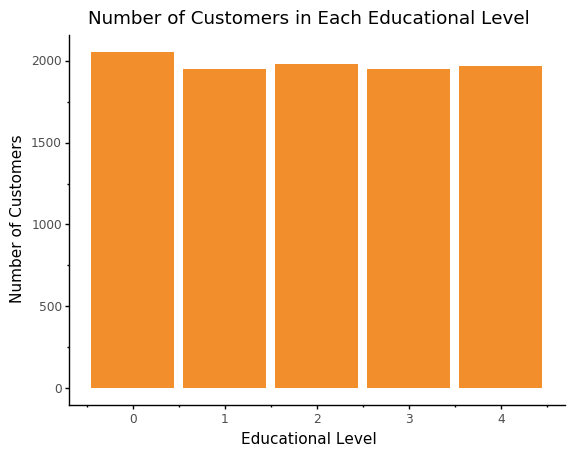

<ggplot: (-9223371901880082636)>

In [135]:
%matplotlib inline
theme_set(theme_classic())
# creating a bar plot to show education level 
(ggplot(data)         # defining what data to use
 + aes(x='elevel')    # defining what variable to use
 + geom_bar(size = 10, fill='#F28E2B') 
 + labs(title='Number of Customers in Each Educational Level', x='Educational Level', y='Number of Customers') # customizing labels
)


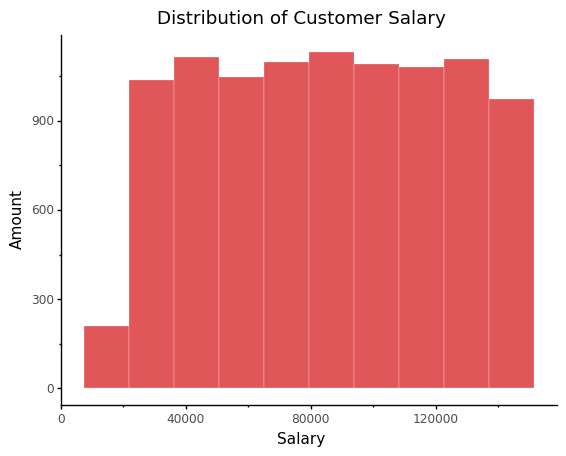

<ggplot: (-9223371901878393452)>

In [67]:
# Histogram of salary (a continuous/numeric) variable
(ggplot(data)
 + aes(x='salary')
 + geom_histogram(bins = 10, size = .1,color='white',fill='#E15759') # with changed binwidth, fixed number of five bins
 + labs(title='Distribution of Customer Salary', x='Salary', y='Amount')
)


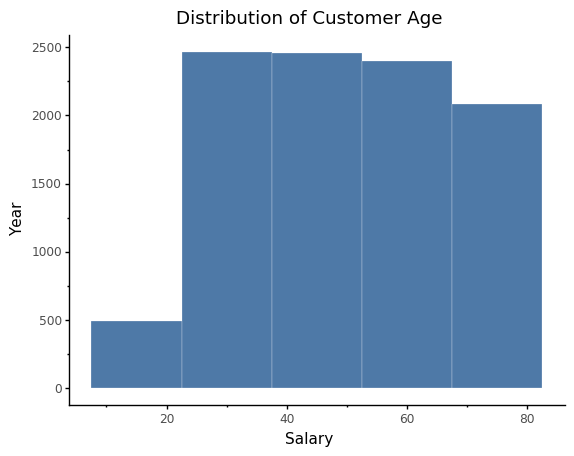

<ggplot: (-9223371901883887744)>

In [23]:
# Histogram of age (a continuous/numeric) variable
(ggplot(data)
 + aes(x='age')
 + geom_histogram(bins = 5, size = .1,color='white',fill='#4E79A7') # with changed binwidth, fixed number of five bins
 + labs(title='Distribution of Customer Age', x='Salary', y='Year')
)


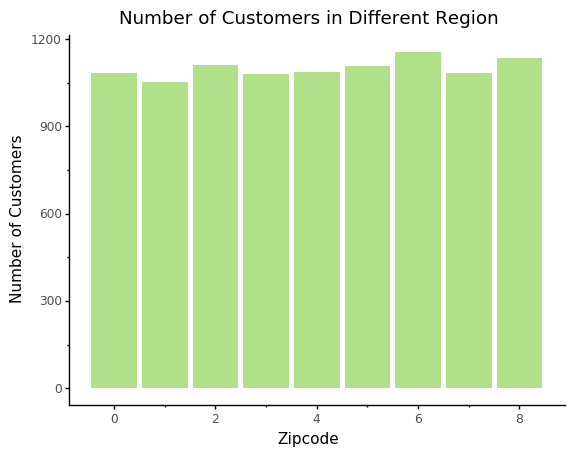

<ggplot: (-9223371901878484296)>

In [134]:
# creating a bar plot to show zipcode
(ggplot(data)         # defining what data to use
 + aes(x='zipcode')    # defining what variable to use
 + geom_bar(size=10, fill='#B2DF8A') # defining the type of plot to use
 + labs(title='Number of Customers in Different Region', x='Zipcode', y='Number of Customers') # customizing labels
)


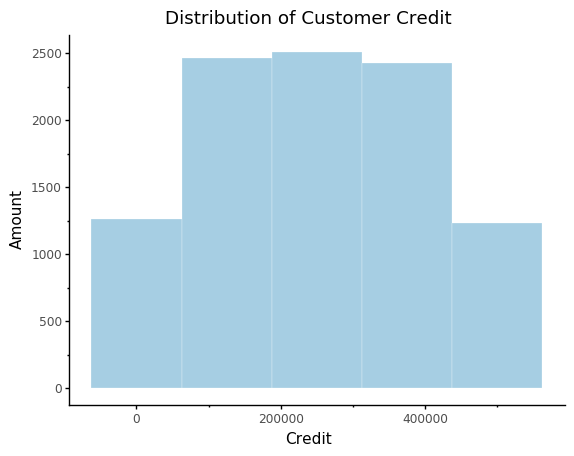

<ggplot: (-9223371901883848060)>

In [31]:
# Histogram of credit (a continuous/numeric) variable
(ggplot(data)
 + aes(x='credit')
 + geom_histogram(bins = 5, size = .1,color='white',fill='#A6CEE3') # with changed binwidth, fixed number of five bins
 + labs(title='Distribution of Customer Credit', x='Credit', y='Amount')
)

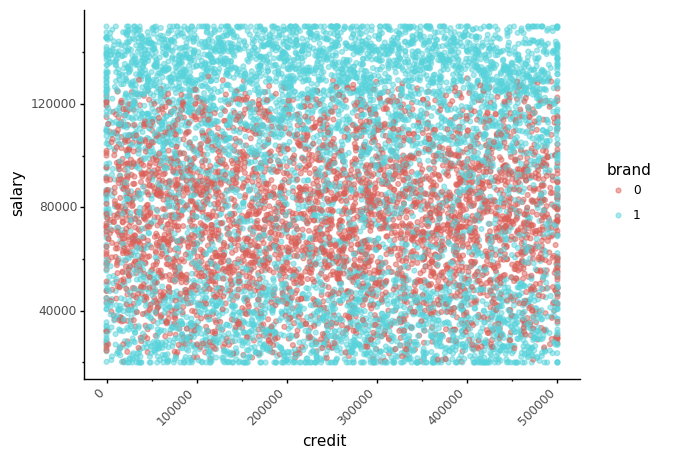

<ggplot: (-9223371901878359164)>

In [142]:
#exploring correlation between salary, credit and brand choices
(ggplot(data=data,
           mapping=aes(x = 'credit', y= 'salary', color='brand'))
 + geom_point(alpha=0.5)
 + theme(axis_text_x = element_text(angle=45, hjust=1))
)

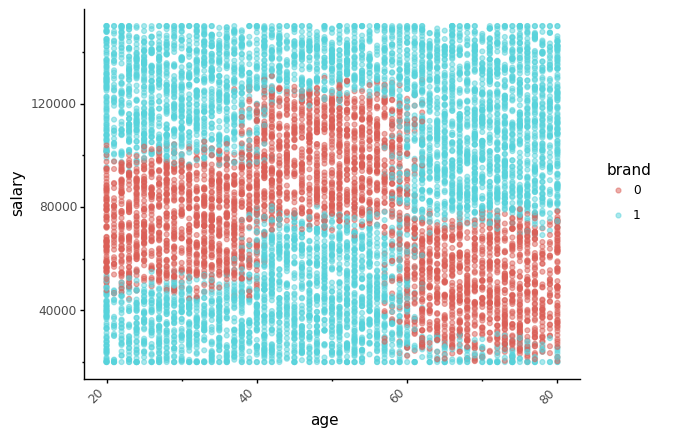

<ggplot: (-9223371901884388052)>

In [143]:
#exploring correlation between salary, age and brand choices
(ggplot(data=data,
    mapping=aes(x = 'age', y= 'salary', color='brand'))
 + geom_point(alpha=0.5)
 + theme(axis_text_x = element_text(angle=45, hjust=1))
)

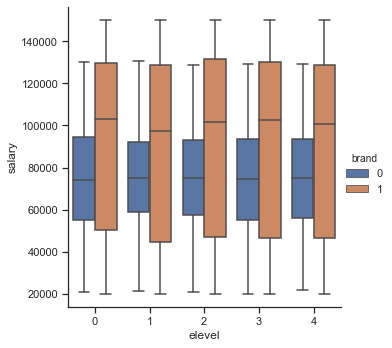

In [144]:
#exploring correlation between education level (categorical) and salary, using boxplot
sns.set(style="ticks", color_codes=True)
sns.catplot(x="elevel", y="salary", hue='brand', kind='box', data=data);

#### Results of preliminary data exploration
#### 1/ Variables of educational level, zipcode (region) and credit all have normal distribution. The distribution of salary sees on the lowest end (< 2,000 dollars income) having the lowest counts, and the distrubtion of age also has on the lowest end (< 20 years old) the lowest counts. 
#### The variable of salary shows correlation with customers' choice of brands - in particular, brand 0 (Acer) concentrate on those customers having salaries in the mid range (between 5000 and 10000). 

           salary       age    elevel       car   zipcode    credit
salary   1.00e+00  7.98e-03 -6.62e-03 -6.09e-03 -5.47e-03 -2.51e-02
age      7.98e-03  1.00e+00 -5.83e-03  1.02e-02  3.68e-03 -4.40e-03
elevel  -6.62e-03 -5.83e-03  1.00e+00 -4.68e-05  1.81e-02  2.72e-03
car     -6.09e-03  1.02e-02 -4.68e-05  1.00e+00  1.53e-03 -1.03e-02
zipcode -5.47e-03  3.68e-03  1.81e-02  1.53e-03  1.00e+00  4.96e-03
credit  -2.51e-02 -4.40e-03  2.72e-03 -1.03e-02  4.96e-03  1.00e+00


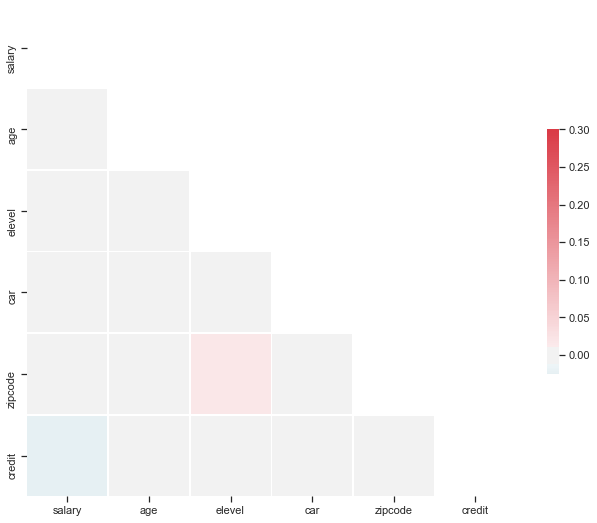

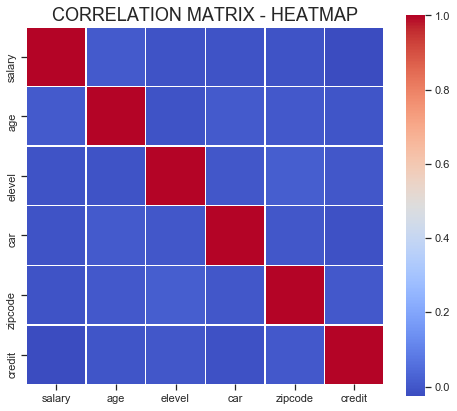

In [201]:
# calculate column correlations and make a seaborn diagonal correclation matrix
corr = data.corr() # .corr is used to find corelation
print(corr)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# another type of headmap to show correlation - looking at correlations matrix, defined via Pearson function  
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

#### Vriables show none or weak correlation.

In [150]:
# Covariance is often used to gauge the linear degree of change between two variables - use covariance to measure how changes in one variable are associated with changes in a second variable.
cov = data.cov()
print(cov)

           salary       age    elevel       car  zipcode    credit
salary   1.42e+09   5294.67 -3.55e+02 -1.33e+03  -532.75 -1.38e+08
age      5.29e+03    309.64 -1.46e-01  1.04e+00     0.17 -1.12e+04
elevel  -3.55e+02     -0.15  2.02e+00 -3.83e-04     0.07  5.61e+02
car     -1.33e+03      1.04 -3.83e-04  3.33e+01     0.02 -8.66e+03
zipcode -5.33e+02      0.17  6.64e-02  2.27e-02     6.67  1.86e+03
credit  -1.38e+08 -11244.83  5.61e+02 -8.66e+03  1860.48  2.11e+10


### Pre-processing data

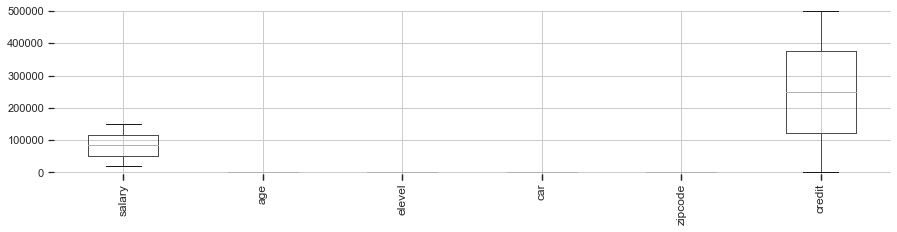

In [195]:
# Separating features and target
y = data.brand     # target default=1 or non-default=0
features = data.drop('brand', axis = 1, inplace = False)

## data are distributed in a wide range (below), need to be normalizded / standardised.
plt.figure(figsize=(15,3))
ax= data.drop('brand', axis=1).boxplot(data.columns.name, rot=90)
outliers = dict(markerfacecolor='b', marker='p')
ax= features.boxplot(features.columns.name, rot=90, flierprops=outliers)
plt.xticks(size=12)
ax.set_ylim([-5000,500000])
plt.box(False);

In [200]:
# Standardizing and plotting the data
scaler = StandardScaler()
print(scaler.fit(data))
data_st = scaler.fit(data)
StandardScaler()
print(scaler.mean_)
print(scaler.transform(data))

StandardScaler(copy=True, with_mean=True, with_std=True)
[8.48708623e+04 4.97786421e+01 1.98292584e+00 1.05219236e+01
 4.04081633e+00 2.49175967e+05 6.21741766e-01]
[[ 0.92641949 -0.27157863 -1.39594457 ... -0.01580847  1.32821017
  -1.28206731]
 [ 0.58364789  0.75139299 -0.69196233 ...  0.75880672 -1.4060801
   0.77999025]
 [-0.18165028 -1.52187726 -1.39594457 ... -0.79042367 -1.37999171
  -1.28206731]
 ...
 [ 0.3435979   0.92188826  0.0120199  ... -1.56503887  1.03489218
   0.77999025]
 [-1.72023635 -1.46504551 -0.69196233 ... -1.17773127 -0.1788606
   0.77999025]
 [ 0.30652793 -0.89672794 -0.69196233 ...  1.14611432 -0.17317786
  -1.28206731]]


### Machine Learning: Classification models

In [205]:
#Models
modelRF = RandomForestClassifier()

###

In [162]:
# Original dataset
X = data.drop('brand', axis=1)  
y = data['brand']

# split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, stratify=y, random_state=42)
X_train.shape, X_test.shape
y_train.shape, y_test.shape

In [207]:
# choosing the right model? 
from sklearn.model_selection import cross_val_score
print(cross_val_score(modelRF, X_train, y_train, cv=3)) 

[0.91677974 0.92579186 0.90904977]
